<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/charp3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 準備

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
import matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

SyntaxError: ignored

## 3.2 画像の標本化と量子化

- 画像の標本化によるサンプリング数と画質の変化
- 画像の階調をピクセル値のデータタイプから調査する
- 階調画像の作成

### 3.2.1 標本化(サンプリング)
人→画像のように、実際には連続しているものを等間隔に分けていく操作を「サンプリング」という。離散化ともいう。

行・列それぞれのサンプリング数を減らしていくとマス目の影響が大きくなり、画素数の少ない画像ほど細部の表現ができなくなる。このことを**チェッカーボード効果**と呼ばれる。

リスト 3.2.1 チェッカーボード効果の確認

サンプリング数が下がることでマス目の影響が強く表れることを確認する。cv2.resize()に渡すリサイズ後のマトリクスサイズは、(幅、高さ)で渡す。

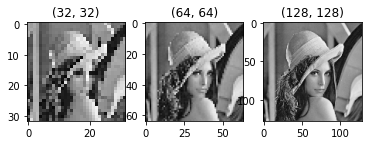

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 画像の読み込み
lena = cv2.imread("/content/drive/My Drive/DATASET/dataset/lena-gray.png",
                  cv2.IMREAD_UNCHANGED)

resamples = []
resamples.append(cv2.resize(lena, (32, 32)))
resamples.append(cv2.resize(lena, (64, 64)))
resamples.append(cv2.resize(lena, (128, 128)))

# print(resamples)
# print(type(resamples))

for i, resample in enumerate(resamples):
  plt.subplot(1,len(resamples),(i+1))
  plt.title(str(resample.shape))
  plt.imshow(resample, cmap="gray")
plt.show()

### 3.2.2 有効視野

画像化されていいる領域は有効視野(FOV, Field Of View)と呼ばれる。
有効視野が狭い場合は局所的な領域、広い場合は大局的な領域を画像の中に収めていることを意味する。


リスト 3.2.2 有効視野(FOV)の確認

- ndarray()はN-dimensional arrayの略。N次元配列の意味！

- plt.tight_layout()は、
レイアウトを自動調整してくれる!

左かから, FOV狭い, FOV広い


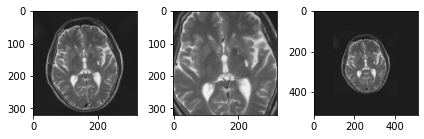

In [4]:
ref_img = cv2.imread(filename='/content/drive/My Drive/DATASET/dataset/MR_LEE_IR87a.jpg',
                     flags=cv2.IMREAD_GRAYSCALE)
h, w = ref_img.shape

# FOV 狭い(narrow)画像を模擬作成
# 中央の200×200をクロップ
narrow = ref_img[59:259, 59:259]
# マトリクスサイズをオリジナルに合わせる
narrow = cv2.resize(narrow, (w, h))

# 試しに表示した
# plt.subplot(111)
# plt.imshow(narrow, cmap='gray')
# plt.tight_layout()

# FOV 広い(wide)画像を模擬作成
# オリジナルの左隅の領域10×10の平均ピクセル値でパディングする
pad_v = ref_img[:10, :10]
mean = np.uint8(np.mean(pad_v)) # 平均ピクセル値
wide = np.zeros((512, 512)) #320*320 to 512*512
# 周囲をパディング
# wide[:,:] = meanでよいが...
wide[:96, :] = mean
wide[416:512,:] = mean
wide[:, :96] = mean
wide[:, 416:512] = mean
# 中心の320×320をもと画像で埋める
wide[96:416, 96:416] = np.copy(ref_img)
# マトリクスサイズをオリジナルに合わせる
wid = cv2.resize(wide, (w, h))
# 画像をリストにまとめる
images = [ref_img, narrow, wide]
print("左かから, FOV狭い, FOV広い")
for i in range(3):
  plt.subplot(1, 3, (i+1))
  plt.imshow(images[i], cmap='gray')
  plt.tight_layout()

### 3.2.3 有効視野とピクセルスペーシング

- ピクセルスペーシング: 格子点間の距離
- 求め方:
  マトリクスサイズ÷有効視野サイズ

### 3.2.4 量子化 (クアンティザーション)

画像の場合、カメラなどの撮影デバイスからの入力信号をあるbit長で規格化されたデータタイプの数値に変換する処理といえる。

階調: 量子化によってきめられて色の段階のこと

### 3.2.5 階調と色深度

階調は色の濃淡が変化する滑らかさのこと。

リスト 3.2.3

モノクロの階調画像を作成する。
表現する階調は256段階(8bit)、列を256,行を30として描く。

matplotlib.image.AxesImage

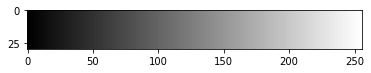

In [28]:
pixels=np.zeros((30, 256))
for i in range(256):
  col=np.zeros(30)
  col=np.uint8(i)
  pixels[:,i]=col
  plt.imshow(pixels,cmap='gray')
type(plt.imshow(pixels,cmap='gray'))

### 3.1.6 ピクセル値のデータタイプ

8bit以上の色深度を持つ画像を目で比較してもあまり変わらないが、画像の数値解析では詳細な情報を捉えることに役立つ。

リスト 3.2.4 データタイプの範囲を調べる

In [30]:
print(np.iinfo(np.int8))
print(np.iinfo(np.int16))
print(np.iinfo(np.int32))
print(np.iinfo(np.int64))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



リスト 3.2.5 オーバーフロー

意図的にオーバーフローを起こす。
オーバーフローによる計算ミスを避け、解析者が適切に処理する必要がある。


In [31]:
num = np.uint8(0)
print(num)
num255 = np.uint8(255)
print(num255)
overFlow = np.uint8(0-1)
print(overFlow)

0
255
255


### 3.2.7 signed(符号付)/Unsigned(符号なし)データタイプ

データタイプがsignedかunsignedなのかを気にしないと、例えばオーバーフローにより128だけピクセル値がずれた画像になる。

### 3.2.8 データ容量の計算

マトリクスサイズとピクセルのデータタイプがわかれば、画像1枚分のデータ容量を計算できる。